In [1]:
import seaborn as sns
import pandas as pd

# Load the Iris dataset
df = sns.load_dataset('iris')


len(df)

150

In [2]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
X = df.iloc[:, :-1]
y = df['species']


In [3]:
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.33,random_state=42)


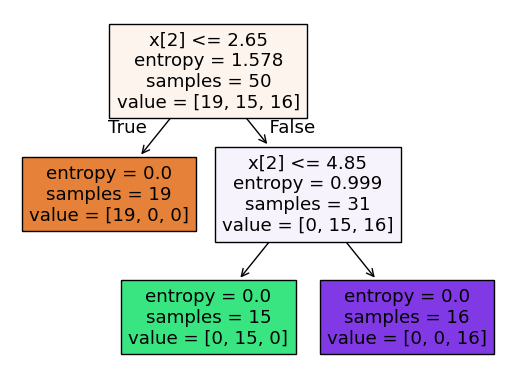

In [4]:
from sklearn.tree import DecisionTreeClassifier
tm=DecisionTreeClassifier( criterion='entropy', max_depth=3,random_state=42)
tm.fit(X_train,y_train)

import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figure=(15,10))
tree.plot_tree(tm,filled=True)


plt.show()

In [5]:
pred=tm.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(pred,y_test)
score2=classification_report(pred,y_test)
print(score," ",score2)

0.93                 precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.89      0.91      0.90        34
           2       0.91      0.89      0.90        35

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



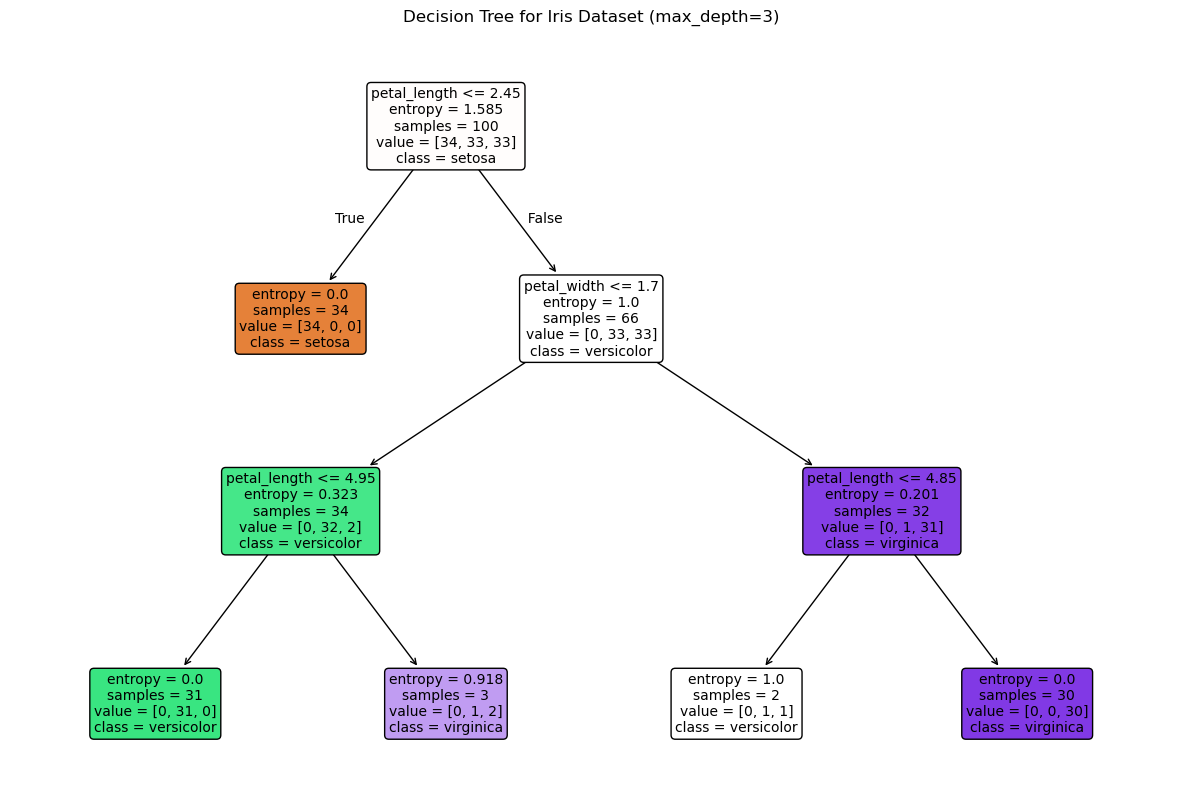

✅ Accuracy Score: 0.940

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      0.94      0.91        17
           2       0.94      0.88      0.91        17

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50

Training Accuracy: 0.980
Testing Accuracy : 0.940

🌟 Feature Importance:
 petal_length    0.683814
petal_width     0.316186
sepal_length    0.000000
sepal_width     0.000000
dtype: float64 

🪚 Testing different pruning values:
  Alpha: 0.0000 | Test Accuracy: 0.9400
  Alpha: 0.0442 | Test Accuracy: 0.9000
  Alpha: 0.0822 | Test Accuracy: 0.9000
  Alpha: 0.4861 | Test Accuracy: 0.3200
  Alpha: 0.9248 | Test Accuracy: 0.3200

📈 Cross-Validation Accuracy (5-fold): 0.96


In [6]:
# ------------------------------
# 🌸 Decision Tree on Iris Dataset
# ------------------------------

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# 1️⃣ Load the dataset
df = sns.load_dataset('iris')

# 2️⃣ Encode the target labels
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

# 3️⃣ Separate features and target
X = df.drop('species', axis=1)
y = df['species']

# 4️⃣ Split the dataset (67% train, 33% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)

# 5️⃣ Create Decision Tree model with pruning control
tm = DecisionTreeClassifier(
    criterion='entropy',    # use 'entropy' for information gain
    max_depth=3,            # limit tree depth to prevent overfitting
    random_state=42
)
tm.fit(X_train, y_train)

# 6️⃣ Visualize the tree
plt.figure(figsize=(15, 10))
plot_tree(
    tm,
    filled=True,
    feature_names=X.columns,
    class_names=le.classes_,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Iris Dataset (max_depth=3)")
plt.show()

# 7️⃣ Make predictions and evaluate
y_pred = tm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy Score: {acc:.3f}\n")
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

# 8️⃣ Check training accuracy to detect overfitting
train_acc = tm.score(X_train, y_train)
print(f"Training Accuracy: {train_acc:.3f}")
print(f"Testing Accuracy : {acc:.3f}\n")

# 9️⃣ Display feature importance
fi = pd.Series(tm.feature_importances_, index=X.columns).sort_values(ascending=False)
print("🌟 Feature Importance:\n", fi, "\n")

# 🔟 Optional: Apply Cost Complexity Pruning (post-pruning)
path = tm.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

print("🪚 Testing different pruning values:")
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    print(f"  Alpha: {ccp_alpha:.4f} | Test Accuracy: {model.score(X_test, y_test):.4f}")

# 1️⃣1️⃣ (Optional) Cross-validation for robustness
cv_scores = cross_val_score(tm, X, y, cv=5)
print("\n📈 Cross-Validation Accuracy (5-fold):", cv_scores.mean().round(3))
